In [286]:
# dependencies
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import os
import json
import timeit
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Gathering Data for this Project

#### 1. WeRateDogs Twitter Archive

In [287]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. Tweet Image Predictions

In [288]:
# download tsv using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects = True)
open('image_predictions.tsv', 'wb').write(r.content)

# import the tsv file containing ANN image predictions
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')

#### 3. Twitter API Query
Unfortunately I was denied by the Twitter to have a developers account. Seemed like a bot was stuck in a loop contacting me. I sent verbatim the recommended script by Udacity for approval but they responded asking for "more" information, although they just asked for the same information again. I retried, this time following the same ideas but in my own words and again they responded they needed more information. After the third attempt they said I was denied developers access.

So below is the code and data supplied by Udacity, although it's dissapointing taking this way out. A recommendation for Udacity is to give a heads up that something like this may be required for a project, like when the studen starts the module. Only concerning from a time perspective, I would have tried setting up the Twitter developers acount earlier when I had more time. The initial request took 18 hours to get a response. In total it was 48 hours between all the back and forth. If I was more pressed for time this could have been a problem for a student closing in a on due date.

```python
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
```

In [289]:
# convert the JSON data in tweet_json.txt to a pandas dataframe
tweets_data = []
tweet_file = open('tweet_json.txt', "r")
for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue   
tweet_file.close()
tweet_info = pd.DataFrame()

# populate the dataframe with desired data columns
def simple_tweet(tweet):
    """extract fields of interest from tweet dict"""
    return {key: tweet[key]
            for key in ['id', 'retweet_count', 'favorite_count']}
tweets = [simple_tweet(tweet) for tweet in tweets_data]
df_3 = pd.DataFrame(tweets)

## Assessing Data for this Project

#### WeRateDogs Twitter Archive

In [290]:
print(df_1.shape)
print('-' * 20)
print(df_1.info())
print('-' * 20)
print(df_1.head())

(2356, 17)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object


In [291]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [292]:
# check there are no duplicates
df_1['tweet_id'].nunique()

2356

In [293]:
df_1['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [294]:
# seeing if denominator feature is really necessary
rows = df_1.shape[0]
EQ, LT, GT = 0, 0, 0
for index, row in df_1.iterrows():
    if df_1['rating_numerator'][index] == df_1['rating_denominator'][index]:
        EQ += 1
    if df_1['rating_numerator'][index] < df_1['rating_denominator'][index]:
        LT += 1   
    if df_1['rating_numerator'][index] > df_1['rating_denominator'][index]:
        GT += 1 
print('total rows: ' + str(rows))
print(f'Equals: {EQ} / Less than: {LT} / Greater than: {GT}')
print(f'Sum of counts: {EQ+LT+GT}')
# at first I thought all the ratings would be greater than one, but it's not the case. The denominator is necessary.

total rows: 2356
Equals: 463 / Less than: 442 / Greater than: 1451
Sum of counts: 2356


In [295]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
348,831670449226514432,NaN,NaN,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831670449...,13,10,Daisy,None,None,None,None
527,808733504066486276,NaN,NaN,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808733504...,12,10,None,None,None,pupper,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,None,None,None,None
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I present to you... Dog Jesus. ...,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
1423,697995514407682048,NaN,NaN,2016-02-12 04:07:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,11,10,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
205,852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None


In [296]:
count = df_1.groupby('doggo').doggo.count()
print('doggo count ' + str(count[1]))
count = df_1.groupby('floofer').floofer.count()
print('floofer count  ' + str(count[1]))
count = df_1.groupby('pupper').pupper.count()
print('pupper count  ' + str(count[1]))
count = df_1.groupby('puppo').puppo.count()
print('puppo count  ' + str(count[1]))

doggo count 97
floofer count  10
pupper count  257
puppo count  30


In [297]:
df_1['source'].nunique()

4

In [298]:
df_1['expanded_urls'].nunique()

2218

In [299]:
# check the dog type catagory 
cats = ['doggo', 
        'floofer',
        'pupper',
        'puppo',]

for c in cats:
    print(df_1[c].count())
    print(df_1[c].nunique())
    print(df_1[c].unique())

2356
2
['None' 'doggo']
2356
2
['None' 'floofer']
2356
2
['None' 'pupper']
2356
2
['None' 'puppo']


### Tweet Image Predictions

In [300]:
print(df_2.shape)
print('-' * 20)
print(df_2.info())
print('-' * 20)
print(df_2.head())

(2075, 12)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
--------------------
             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4

In [301]:
# check there are no duplicates
df_2['tweet_id'].nunique()

2075

In [302]:
df_2['img_num'].nunique()

4

In [303]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Twitter API Query

In [304]:
print(df_3.shape)
print('-' * 20)
print(df_3.info())
print('-' * 20)
print(df_3.head())

(838, 3)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 3 columns):
favorite_count    838 non-null int64
id                838 non-null int64
retweet_count     838 non-null int64
dtypes: int64(3)
memory usage: 19.7 KB
None
--------------------
   favorite_count                  id  retweet_count
0           39467  892420643555336193           8853
1           33819  892177421306343426           6514
2           25461  891815181378084864           4328
3           42908  891689557279858688           8964
4           41048  891327558926688256           9774


In [305]:
df_3.describe()

,favorite_count,id,retweet_count
count,838.000000,8.380000e+02,838.000000
mean,15188.225537,8.245384e+17,5736.091885
std,15236.248317,3.469656e+16,6515.024337
min,0.000000,7.671914e+17,0.000000
25%,5900.750000,7.944983e+17,2351.250000
50%,11913.000000,8.222039e+17,3890.000000
75%,21572.000000,8.521307e+17,6542.750000
max,132810.000000,8.924206e+17,56625.000000


In [306]:
df_3.sample(10)

,favorite_count,id,retweet_count
780,14361,775729183532220416,5302
330,14549,832998151111966721,2522
258,23315,843235543001513987,6852
699,17178,786233965241827333,5571
804,3005,772114945936949249,546
542,0,805958939288408065,6238
814,5498,770787852854652928,1415
111,33791,870804317367881728,6393
269,17305,841314665196081154,5312
710,10039,784517518371221505,2970


In [307]:
# check there are no duplicates
df_3['id'].nunique()

838

## Laundry List

#### WeRateDogs Twitter Archive
- 'timestamp' is the incorrect datatype.
- 'in_replay_to_status_id', 'in_reply_user_id','retweeted_status_id', 'retweeted_status_user_id',                      'retweeted_status_timestamp' are incomplete and should not be included in the data set.
- remove rows with 'rating_numerator' or 'rating_denominator' at 0, will cause issues with math functions.
- 'source' and 'expanded URLs' don't add anything to reporting the data.
- rename 'text' column to 'description'
- normalize the rating columns
- 'doggo', 'floofer', 'pupper', 'puppo' are catagories

#### Tweet Image Predictions
- 'img_num' should be renamed and changed to catagorical
- 'p1_dog', 'p2_dog', and 'p3_dog' add no value and should be dropped
- all dog breed need to be formatted for capitolized letters or not
- rename 'p1', 'p2', 'p3' to something that makes more sense
- remove '\_' and '-' in breed name
- remove mislabeled breeds like 'dishwasher' and consolidate breeds into a single column of the highest probability
    - if all three values in the prediction column are not dogs the row will be dropped

#### Twitter API Query
- There is only one cleaning activity for this data set, the match the feature name 'id' with the other two dataframes
    - the dataframe is complete
    - looking at the 'describe()' function, none of the values seem out of line, although it is strange some images were retweeted often but never favorited. This does not seem like a reason to reject the observations.
    - the features are all appropriate data types
    - there are no duplicate tweet ID numbers

## Cleaning Data for this Project

#### WeRateDogs Twitter Archive

In [308]:
# change 'timestamp' column to datetime datatype
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])
print(df_1['timestamp'].dtypes)
print(np.dtype('datetime64[ns]') == np.dtype('<M8[ns]'))

datetime64[ns]
True


In [309]:
# drop any rows containing values for 'in_replay_to_status_id', 'in_reply_user_id',
    # 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
# drop columns that are empty from above as well as 'source' and 'expanded URLs'
print(df_1.shape[0])
for index, row in df_1.iterrows():
    if str(row[1]) != 'nan': df_1.drop(index, inplace = True)
    if str(row[6]) != 'nan': df_1.drop(index, inplace = True)
print(df_1.shape[0])
cats = ['in_reply_to_status_id',
        'in_reply_to_user_id',
        'retweeted_status_id', 
        'retweeted_status_user_id', 
        'retweeted_status_timestamp',
        'expanded_urls',
        'source',]
for c in cats:
    df_1.drop(c, axis=1, inplace = True) 

2356
2097


In [310]:
# drop the rows with a numerator of 0
df_1 = df_1.drop(df_1.index[df_1.rating_numerator == 0])
df_1 = df_1.drop(df_1.index[df_1.rating_denominator == 0])
df_1.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.096000e+03,2096.000000,2096.00000
mean,7.365123e+17,12.195134,10.44895
std,6.708321e+16,40.373750,6.64664
min,6.660209e+17,1.000000,2.00000
25%,6.768177e+17,10.000000,10.00000
50%,7.097095e+17,11.000000,10.00000
75%,7.874779e+17,12.000000,10.00000
max,8.924206e+17,1776.000000,170.00000


In [311]:
# show the unique values in numerator and denominator columns
print(df_1['rating_numerator'].unique())
print(df_1['rating_denominator'].unique())

[  13   12   14    5   11    6   10   84   24   75   27    3    7    8
    9    4  165 1776  204   50   99   80   45   60   44  121   26    2
  144   88    1  420]
[ 10  70   7 150  11 170  20  50  90  80  40 110 120   2]


In [312]:
df_1.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1519,690735892932222976,2016-01-23 03:20:44,Say hello to Peaches. She's a Dingleberry Zand...,13,10,Peaches,None,None,None,None
49,882762694511734784,2017-07-06 00:46:41,This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,None,None,pupper,None
167,859851578198683649,2017-05-03 19:26:06,Meet Trooper. He picks pup recyclables that ha...,13,10,Trooper,None,None,None,None


In [313]:
# normalize the rating columns to values between 0 and 1
df_1['numerator_norm'] = ((df_1['rating_numerator']-df_1['rating_numerator'].min())/(df_1['rating_numerator'].max()-df_1['rating_numerator'].min()))
df_1['denominator_norm'] = ((df_1['rating_denominator']-df_1['rating_denominator'].min())/(df_1['rating_denominator'].max()-df_1['rating_denominator'].min()))
df_1['normalized_rating'] = np.nan

df_1['normalized_rating'] = df_1['numerator_norm'] / df_1['denominator_norm']

In [314]:
# test the results
df_1.describe()

,tweet_id,rating_numerator,rating_denominator,numerator_norm,denominator_norm,normalized_rating
count,2.096000e+03,2096.000000,2096.00000,2096.000000,2096.000000,2095.000000
mean,7.365123e+17,12.195134,10.44895,0.006307,0.050291,0.126559
std,6.708321e+16,40.373750,6.64664,0.022746,0.039563,0.469434
min,6.660209e+17,1.000000,2.00000,0.000000,0.000000,0.000000
25%,6.768177e+17,10.000000,10.00000,0.005070,0.047619,0.106479
50%,7.097095e+17,11.000000,10.00000,0.005634,0.047619,0.118310
75%,7.874779e+17,12.000000,10.00000,0.006197,0.047619,0.130141
max,8.924206e+17,1776.000000,170.00000,1.000000,1.000000,21.000000


In [315]:
# remove extreme outliers
print(df_1.shape[0])
df_1 = df_1.drop(df_1.index[df_1.normalized_rating == 0])
df_1 = df_1.drop(df_1.index[df_1.numerator_norm == 0])
df_1 = df_1.drop(df_1.index[df_1.denominator_norm == 0])
df_1 = df_1.drop(df_1.index[df_1.normalized_rating > 1])
df_1.dropna(subset=['normalized_rating'], inplace = True)
print(df_1.shape[0])

2096
2089


In [316]:
df_1.describe()

,tweet_id,rating_numerator,rating_denominator,numerator_norm,denominator_norm,normalized_rating
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,7.366985e+17,11.182384,10.454284,0.005737,0.050323,0.114497
std,6.709821e+16,8.036421,6.655158,0.004528,0.039614,0.031312
min,6.660209e+17,2.000000,7.000000,0.000563,0.029762,0.011831
25%,6.769170e+17,10.000000,10.000000,0.005070,0.047619,0.106479
50%,7.099188e+17,11.000000,10.000000,0.005634,0.047619,0.118310
75%,7.878106e+17,12.000000,10.000000,0.006197,0.047619,0.130141
max,8.924206e+17,204.000000,170.000000,0.114366,1.000000,0.875493


In [317]:
df_1['normalized_rating'].unique()

array([0.14197183, 0.13014085, 0.15380282, 0.04732394, 0.11830986,
       0.05915493, 0.10647887, 0.1155261 , 0.43538028, 0.87549296,
       0.30760563, 0.02366197, 0.07098592, 0.0828169 , 0.09464789,
       0.03549296, 0.10488009, 0.08413146, 0.1143662 , 0.01577465,
       0.09661972, 0.10540333, 0.09586132, 0.08676056, 0.11633803,
       0.10710156, 0.10516432, 0.06309859, 0.29577465, 0.01183099,
       0.11470041, 0.1055688 ])

In [318]:
df_1.rename(columns={'text': 'description'}, inplace = True)

In [319]:
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    df_1[col] = df_1[col].astype('category')
df_1.drop(['rating_numerator', 'rating_denominator', 'numerator_norm', 'denominator_norm'], axis=1, inplace = True)
print(df_1.sample(3))
print(df_1.info())

                tweet_id           timestamp  \
43    884162670584377345 2017-07-09 21:29:42   
1527  690360449368465409 2016-01-22 02:28:52   
1253  710833117892898816 2016-03-18 14:19:56   

                                            description  name  doggo floofer  \
43    Meet Yogi. He doesn't have any important dog m...  Yogi  doggo    None   
1527  Stop sending in lobsters. This is the final wa...   the   None    None   
1253  Say hello to Sora. She's an Egyptian Pumpernic...  Sora   None    None   

     pupper puppo  normalized_rating  
43     None  None           0.130141  
1527   None  None           0.094648  
1253   None  None           0.130141  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id             2089 non-null int64
timestamp            2089 non-null datetime64[ns]
description          2089 non-null object
name                 2089 non-null object
doggo                2089 non-null category
floof

#### Tweet Image Predictions

In [320]:
# change 'img_num' column name
df_2.rename(columns={'img_num': 'tweet_image_number'}, inplace = True)
# change this to a catagorical data type
df_2['tweet_image_number'] = df_2['tweet_image_number'].astype('category')

In [321]:
# drop columns
df_2.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

In [322]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
tweet_image_number    2075 non-null category
p1                    2075 non-null object
p1_conf               2075 non-null float64
p2                    2075 non-null object
p2_conf               2075 non-null float64
p3                    2075 non-null object
p3_conf               2075 non-null float64
dtypes: category(1), float64(3), int64(1), object(4)
memory usage: 132.0+ KB


In [323]:
# cleanup the 'p1', 'p2', and 'p3' columns
for col in ['p1', 'p2', 'p3']:
    df_2[col] = df_2[col].str.replace('_',' ')
    df_2[col] = df_2[col].str.replace('-',' ') 
    df_2[col] = df_2[col].str.title()
df_2.rename(columns={'p1': 'breed_probability_1', 'p2': 'breed_probability_2', 'p3': 'breed_probability_3'}, inplace = True)

In [324]:
df_2.sample(3)

,tweet_id,jpg_url,tweet_image_number,breed_probability_1,p1_conf,breed_probability_2,p2_conf,breed_probability_3,p3_conf
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,Malamute,0.841597,Siberian Husky,0.073644,Eskimo Dog,0.072129
750,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,Pomeranian,0.997210,Pekinese,0.000803,Keeshond,0.000373
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian Greyhound,0.259916,American Staffordshire Terrier,0.198451,Staffordshire Bullterrier,0.127725


##### Scrape a list of dog breeds from [dogtime.com](https://dogtime.com/dog-breeds/profiles) to compare with df_2['p1', 'p2', 'p3']

As a note, I realize this scraped list from dogtime.com is not comprehensive and because of this there are some inconsistancies between the list and the data set the comparison is not perfect. It was more for the sake of a scraping exercise to gather more data because I could not do the Twitter API portion and to show that I idenified the errors in the Tweet Image Predictions data set. This would obviously be scrubbed more thoroughly in a real world activity.

In [325]:
#specify the URL
page = requests.get('https://dogtime.com/dog-breeds/profiles')
# check the response
page

<Response [200]>

In [326]:
# check that it worked
page.status_code

200

In [327]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="bc06c90d1acb18ed0abe8e9b9c02db20" name="p:domain_verify">
   <meta content="width=device-width, initial-scale=1, maximum-scale=1, minimal-ui" name="viewport"/>
   <title>
    All Dog Breeds - Complete List of Dog Profiles
   </title>
   <style>
    *,.top-nav .menu{box-sizing:border-box}.coverpanel,.coverpanel-wrapper,.ir,.toggle-menu,.top-logo,.top-nav .menu .menu-item,svg:not(:root){overflow:hidden}.search-field,img{vertical-align:middle}.fb_reset,.top-logo,a{text-decoration:none}.home .content{padding:0 8px 8px}.home.main .widget_pb_coverpanel_widget{margin:0 -8px;min-height:314px}.sidebar-top,.top-300-promo,.top-300-promo .promo{min-height:250px}.coverpanel{position:relative;width:100%;max-width:414px;margin:0 auto;max-height:370px}.ho

In [328]:
# create the list of dog breeds
breeds = []
soup_dump = soup.findAll('a', class_ = 'post-title')
for breed in soup_dump:
    breed = str(breed).split('>', 1)
    breed = breed[1].split('<', 1)
    breeds.append(breed[0])
breeds

['Affenpinscher',
 'Afghan Hound',
 'Airedale Terrier',
 'Akita',
 'Alaskan Klee Kai',
 'Alaskan Malamute',
 'American Bulldog',
 'American English Coonhound',
 'American Eskimo Dog',
 'American Foxhound',
 'American Pit Bull Terrier',
 'American Staffordshire Terrier',
 'American Water Spaniel',
 'Anatolian Shepherd Dog',
 'Appenzeller Sennenhunde',
 'Australian Cattle Dog',
 'Australian Kelpie',
 'Australian Shepherd',
 'Australian Terrier',
 'Azawakh',
 'Barbet',
 'Basenji',
 'Basset Hound',
 'Beagle',
 'Bearded Collie',
 'Bedlington Terrier',
 'Belgian Malinois',
 'Belgian Sheepdog',
 'Belgian Tervuren',
 'Berger Picard',
 'Bernedoodle',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Black and Tan Coonhound',
 'Black Mouth Cur',
 'Black Russian Terrier',
 'Bloodhound',
 'Blue Lacy',
 'Bluetick Coonhound',
 'Boerboel',
 'Bolognese',
 'Border Collie',
 'Border Terrier',
 'Borzoi',
 'Boston Terrier',
 'Bouvier des Flandres',
 'Boxer',
 'Boykin Spaniel',
 'Bracco Italiano',
 'Briard',
 'B

In [329]:
df_2.shape

(2075, 9)

In [330]:
# check the predicted dog breed values again the scraped list and mark as 'NaN' if not matches,
# then drop the rows that all three are 'NaN'
for index, row in df_2.iterrows():
    if not any(breed == row[3] for breed in breeds):
        row[3] = 'NaN'
    df_2.loc[index, 'breed_probability_1'] = row[3]
    if not any(breed == row[5] for breed in breeds):
        row[5] = 'NaN'
    df_2.loc[index, 'breed_probability_2'] = row[5]
    if not any(breed == row[7] for breed in breeds):
        row[7] = 'NaN'
    df_2.loc[index, 'breed_probability_3'] = row[7]
    if df_2['breed_probability_1'][index] and df_2['breed_probability_2'][index] and df_2['breed_probability_3'][index] == 'NaN': df_2.drop(index, inplace=True)

In [331]:
df_2.head(10)

,tweet_id,jpg_url,tweet_image_number,breed_probability_1,p1_conf,breed_probability_2,p2_conf,breed_probability_3,p3_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,Collie,0.156665,Shetland Sheepdog,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,NaN,0.506826,Miniature Pinscher,0.074192,Rhodesian Ridgeback,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,NaN,0.596461,NaN,0.138584,Bloodhound,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,NaN,0.360687,Miniature Pinscher,0.222752
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,NaN,0.263788,Greater Swiss Mountain Dog,0.016199
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,NaN,0.962465,NaN,0.014594,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,NaN,0.201493,Komondor,0.192305,Soft Coated Wheaten Terrier,0.082086
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden Retriever,0.775930,Tibetan Mastiff,0.093718,Labrador Retriever,0.072427
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,NaN,0.260857,English Foxhound,0.175382,Ibizan Hound,0.097471
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,Pug,0.489814,NaN,0.404722,French Bulldog,0.048960


In [332]:
df_2.shape

(954, 9)

In [333]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 0 to 2073
Data columns (total 9 columns):
tweet_id               954 non-null int64
jpg_url                954 non-null object
tweet_image_number     954 non-null category
breed_probability_1    954 non-null object
p1_conf                954 non-null float64
breed_probability_2    954 non-null object
p2_conf                954 non-null float64
breed_probability_3    954 non-null object
p3_conf                954 non-null float64
dtypes: category(1), float64(3), int64(1), object(4)
memory usage: 68.2+ KB


In [334]:
# create new columns with 'most probable' dog breed and and confidence level. Drop the originals
df_2['most_probable_breed'] = ''
df_2['breed_confidence'] = ''
length = len(df_2)
for index, row in df_2.iterrows():
    if df_2['breed_probability_1'][index] != 'NaN':
        df_2.loc[index, 'most_probable_breed'] = row[3]
        df_2.loc[index, 'breed_confidence'] = row[4]
    else:
        if df_2['breed_probability_2'][index] != 'NaN':
            df_2.loc[index, 'most_probable_breed'] = row[5]
            df_2.loc[index, 'breed_confidence'] = row[6]
        else:
            df_2.loc[index, 'most_probable_breed'] = row[7]
            df_2.loc[index, 'breed_confidence'] = row[8]
# drop columns
df_2.drop(['breed_probability_1',
           'p1_conf',
           'breed_probability_2',
           'p2_conf',
           'breed_probability_3',
           'p3_conf'], axis=1, inplace=True)
# change the breed_confidence feature to a float
df_2['breed_confidence'] = df_2['breed_confidence'].astype('float')
df_2.head(10)

,tweet_id,jpg_url,tweet_image_number,most_probable_breed,breed_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature Pinscher,0.074192
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Bloodhound,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Komondor,0.192305
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden Retriever,0.775930
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,English Foxhound,0.175382
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,Pug,0.489814


#### Twitter API Query

In [335]:
# rename 'id' column for merging
df_3.rename(columns={'id': 'tweet_id'}, inplace = True)
df_3.sample(1)

,favorite_count,tweet_id,retweet_count
645,6909,793150605191548928,1984


## Merging

In [336]:
# check the df shapes
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(2089, 9)
(954, 5)
(838, 3)


In [337]:
# check the dataframes are complete
print(df_1.isnull().values.any())
print(df_2.isnull().values.any())
print(df_3.isnull().values.any())

False
False
False


In [338]:
# perform the merging
df = pd.merge(df_2, df_1, on='tweet_id')
print(df.shape)
df = pd.merge(df, df_3, on='tweet_id')
print(df.shape)

(908, 13)
(298, 15)


In [339]:
print(df.isnull().values.any())

False


In [340]:
df.head(5)

,tweet_id,jpg_url,tweet_image_number,most_probable_breed,breed_confidence,timestamp,description,name,doggo,floofer,pupper,puppo,normalized_rating,favorite_count,retweet_count
0,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,Golden Retriever,0.165063,2016-08-21 23:15:55,This is Louie. He's making quite a h*ckin mess...,Louie,None,None,None,None,0.130141,8295,2688
1,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,Vizsla,0.307794,2016-08-22 16:06:54,This is Philbert. His toilet broke and he does...,Philbert,None,None,None,None,0.118310,17814,6221
2,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,Great Pyrenees,0.729745,2016-08-24 23:50:10,Say hello to Oakley and Charlie. They're convi...,Oakley,None,None,None,None,0.130141,5592,1473
3,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,Basenji,0.183283,2016-08-25 00:43:02,This is Lou. His sweater is too small and he a...,Lou,None,None,None,None,0.106479,4580,1382
4,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,Rottweiler,0.055114,2016-08-25 16:58:45,This is Jesse. He really wants a belly rub. Wi...,Jesse,None,None,None,None,0.118310,4660,1034


## Storing, Analyzing, and Visualizing Data for this Project

In [341]:
# save the dataframe
df.to_csv('twitter_archive_master.csv')

In [342]:
df['most_probable_breed'] = df['most_probable_breed'].astype('category')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 15 columns):
tweet_id               298 non-null int64
jpg_url                298 non-null object
tweet_image_number     298 non-null category
most_probable_breed    298 non-null category
breed_confidence       298 non-null float64
timestamp              298 non-null datetime64[ns]
description            298 non-null object
name                   298 non-null object
doggo                  298 non-null category
floofer                298 non-null category
pupper                 298 non-null category
puppo                  298 non-null category
normalized_rating      298 non-null float64
favorite_count         298 non-null int64
retweet_count          298 non-null int64
dtypes: category(6), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 28.5+ KB


In [344]:
df.describe()

,tweet_id,breed_confidence,normalized_rating,favorite_count,retweet_count
count,2.980000e+02,298.000000,298.000000,298.000000,298.000000
mean,8.254651e+17,0.423249,0.132942,19514.647651,5190.130872
std,3.506690e+16,0.344811,0.022503,15657.117271,5611.708759
min,7.675005e+17,0.000056,0.023662,3005.000000,546.000000
25%,7.962085e+17,0.086408,0.130141,10098.500000,2390.250000
50%,8.218260e+17,0.356173,0.130141,14587.500000,3551.000000
75%,8.539478e+17,0.738836,0.141972,24539.750000,5662.000000
max,8.921774e+17,0.999828,0.435380,132810.000000,48265.000000


In [345]:
# next compare retweet numbers against dogs with 'stage'
sum_df = df.groupby(['doggo','floofer', 'puppo', 'pupper']).agg({'retweet_count': 'sum'})
sum_df

retweet_count
doggo floofer puppo pupper               
None  None    None  None          1191638
                    pupper          96284
              puppo None            73962
      floofer None  None            25587
doggo None    None  None           150146
                    pupper           5609
      floofer None  None             3433

In [346]:
blank_retweet_count = sum_df.iloc[0]
stage_retweet_count = sum_df.iloc[1] + sum_df.iloc[2] + sum_df.iloc[3] + sum_df.iloc[4] + sum_df.iloc[5] + sum_df.iloc[6]
print('Total number of retweets: ' + str(sum(df['retweet_count'])))
print('No stage attribute retweet count: ' + str(blank_retweet_count.iloc[0]))
print('At least one stage attribute retweet count: ' + str(stage_retweet_count[0]))

Total number of retweets: 1546659
No stage attribute retweet count: 1191638
At least one stage attribute retweet count: 355021


In [347]:
# percent of retweets coming from observations with at least one 'stage' 
count = 0
for index, row in df.iterrows():
    if row[7] == 'None' and row[8] == 'None' and row[9] == 'None' and row[10] == 'None':
        count += 1
stage_retweet_percent = (stage_retweet_count / sum(df['retweet_count']) * 100)
print(stage_retweet_percent)
print(count)

retweet_count    22.954058
dtype: float64
36


In [348]:
d = {}
# 1 - Put stages in a list variable
stages = ['doggo', 'floofer', 'puppo', 'pupper']

for stage in stages:
    d[stage] = df.groupby(stage)['retweet_count'].sum()
stage_retweets = pd.DataFrame.from_dict(d)
#print(stage_retweets)

# 2 - Create a column conditionnaly to detect if the index in stages list or not
# !! important !! make shure you have only one index level otherwise stage_retweets.index.isin(stages) won't work
stage_retweets['retweet_catagory'] = np.where(stage_retweets.index.isin(stages), 'Stage', 'None')
#print(stage_retweets)

# 3 - Groupby this new column
stage_retweets = stage_retweets.groupby('retweet_catagory').sum().reset_index()
#print(stage_retweets)

stage_retweets

,retweet_catagory,doggo,floofer,puppo,pupper
0,None,1387471.0,1517639.0,1472697.0,1444766.0
1,Stage,159188.0,29020.0,73962.0,101893.0


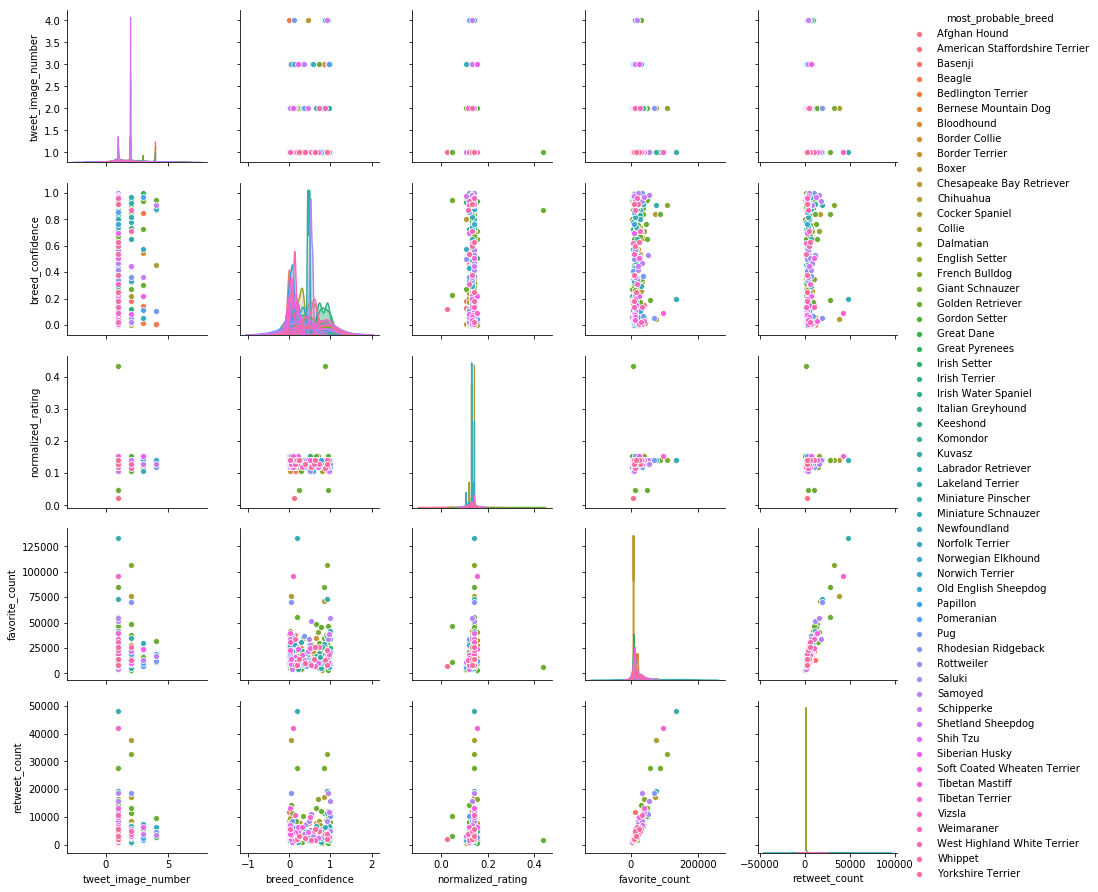

In [349]:
sns.pairplot(df[['tweet_image_number','breed_confidence', 'normalized_rating', 'favorite_count', 'retweet_count', 'most_probable_breed']], hue = 'most_probable_breed')

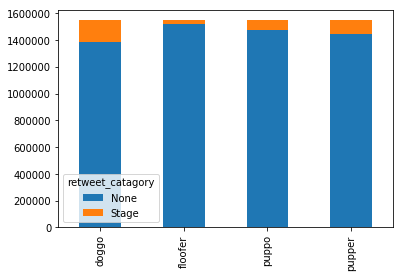

In [350]:
# total number of retweets with None vs any particular column, each row in the graph contains the total number of retweets
stage_retweets.set_index('retweet_catagory').T.plot(kind='bar', stacked=True)

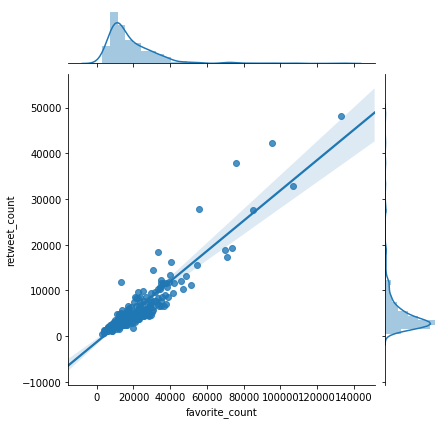

In [351]:
# closer look at the only positive correlation in the data frame
sns.jointplot(x='favorite_count', y='retweet_count', data=df, kind="reg")

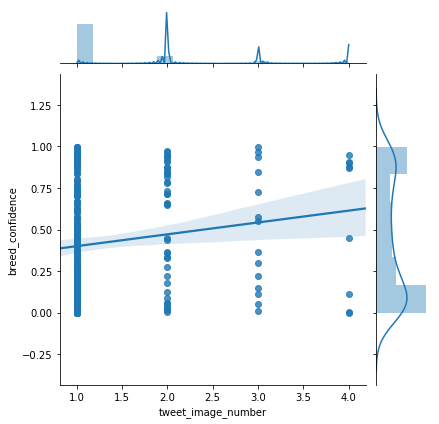

In [352]:
# interesting that the majority of observations used the fist image in the tweet to make the breed classification, 
# yet the further into the images it got the higher the 'confidence' is of the breed selection
sns.jointplot(x='tweet_image_number', y='breed_confidence', data=df, kind="reg")

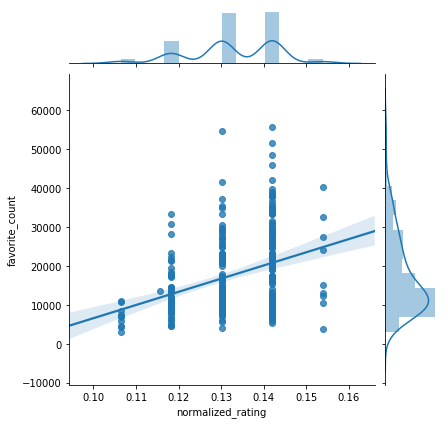

In [353]:
# removing outliers, we can see a generally positive correlation between the dog's rating and retweet favorites
_ = df.drop(df.index[df.normalized_rating > 0.4])
_ = _.drop(_.index[_.normalized_rating < 0.1])
_ = _.drop(_.index[_.favorite_count > 60000])
sns.jointplot(x='normalized_rating', y='favorite_count', data=_, kind="reg")

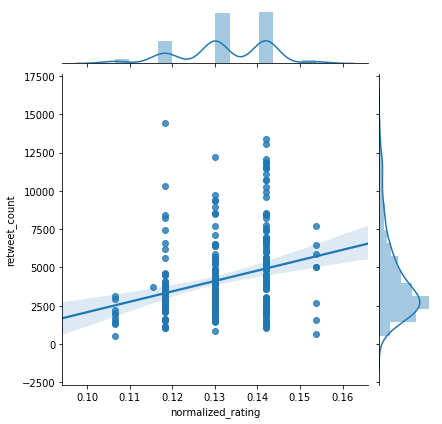

In [354]:
# because there was such a strong correlation between retween count and favorite count, it's not a surprse theres a similar 
# pattern here between retweet count and normalized rating - just like above
_ = _.drop(_.index[_.retweet_count > 15000])
sns.jointplot(x='normalized_rating', y='retweet_count', data=_, kind="reg")

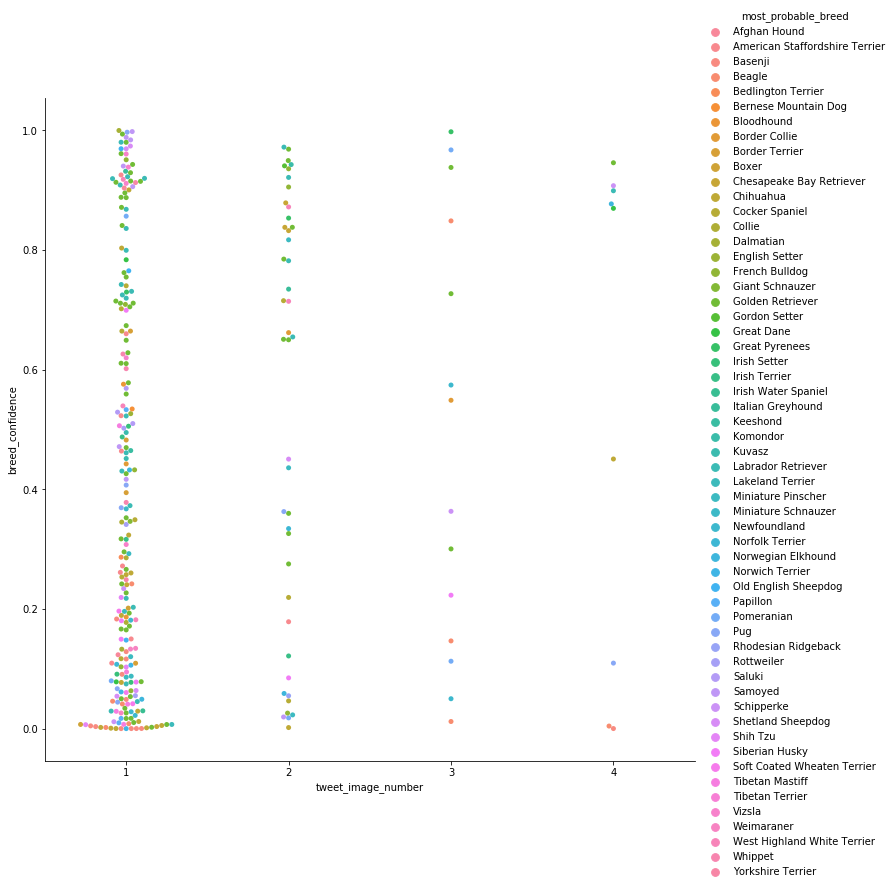

In [355]:
# no particular breed appears to have been failing the classification earlier than another breed based on the image number used
sns.catplot(x="tweet_image_number", y="breed_confidence", hue="most_probable_breed", kind="swarm", data=df, legend_out = True, height=10, aspect=1);

In [361]:
most_popular = df.groupby('most_probable_breed')['retweet_count'].sum().reset_index().sort_values(by='retweet_count', ascending=False)
most_popular

,most_probable_breed,retweet_count
18,Golden Retriever,327590
29,Labrador Retriever,127875
16,French Bulldog,87181
11,Chihuahua,80399
44,Samoyed,71995
12,Cocker Spaniel,69757
2,Basenji,59647
30,Lakeland Terrier,50300
51,Tibetan Terrier,42228
3,Beagle,40180


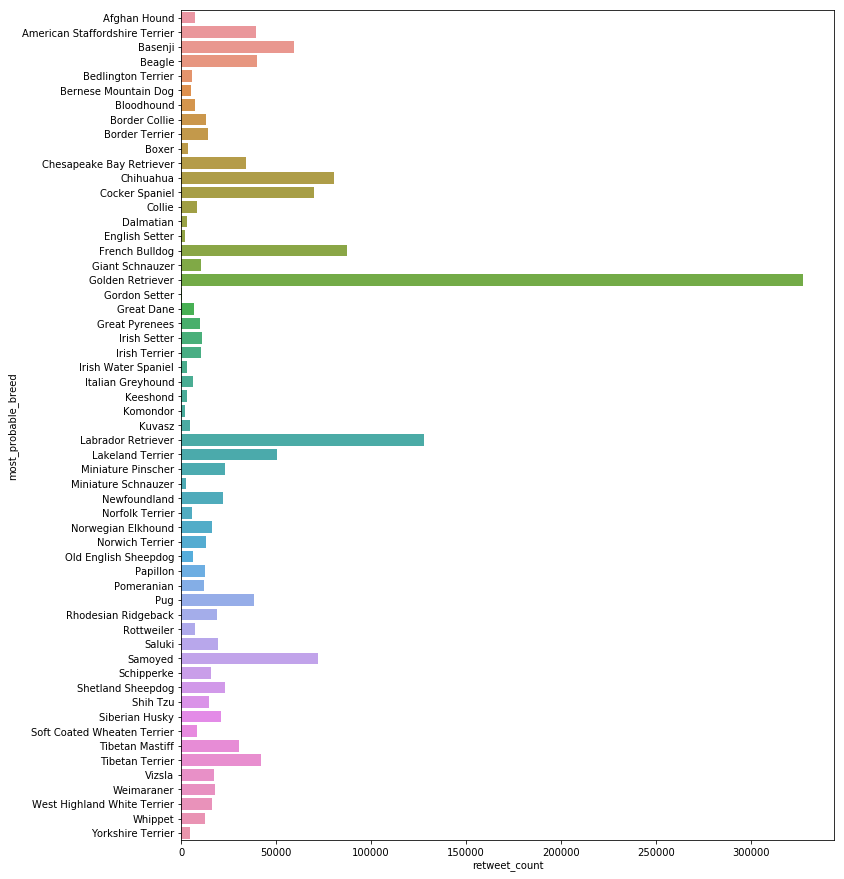

In [362]:
a4_dims = (11.7, 15.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x='retweet_count',y='most_probable_breed',data=most_popular)